In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier

import joblib

In [212]:
file=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [213]:
df=pd.DataFrame(file)

In [214]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [215]:
df['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [217]:
df.shape

(31647, 18)

In [218]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

# EDA

## null values

In [219]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Label Encoding

In [220]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [221]:
encoder= LabelEncoder()

In [222]:
obj_var = df.select_dtypes(include='object')

In [223]:
for col in df.select_dtypes(include='object'):
    print("Value counts before label encoding for column : ",col)
    print(df[col].value_counts())
    # Perform label encoding
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    # Print the value counts after label encoding
    print("Value counts after label encoding for column : ",col)
    print(df[col].value_counts())

Value counts before label encoding for column :  job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
Value counts after label encoding for column :  job
1     6842
4     6639
9     5307
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64
Value counts before label encoding for column :  marital
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
Value counts after label encoding for column :  marital
1    19095
2     8922
0     3630
Name: marital, dtype: int64
Value counts before label encoding for column :  education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
Value counts after label encod

In [224]:
df.dtypes

ID            int64
age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

In [225]:
df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
26741,19968,46,1,1,1,0,723,0,0,0,8,1,63,2,-1,0,3,0
26291,39786,58,4,1,2,0,2764,0,0,0,1,6,459,1,196,1,0,0
28434,20427,31,4,2,2,0,30,0,0,0,12,1,348,2,-1,0,3,0
14836,2099,31,7,2,1,0,2963,1,0,2,12,8,124,1,-1,0,3,0
11682,13316,59,4,1,2,0,1726,0,1,0,8,5,137,3,-1,0,3,0


### data visualization

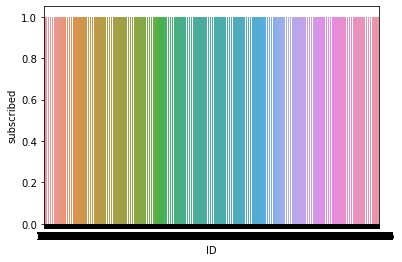

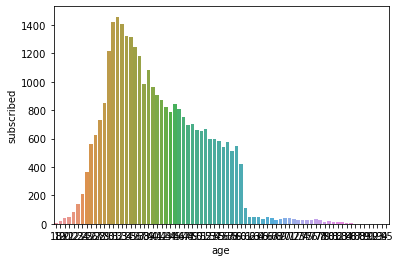

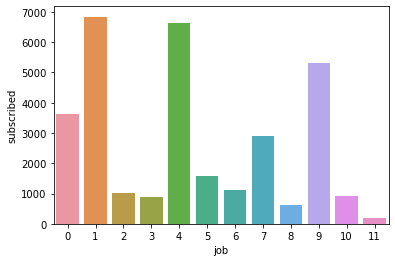

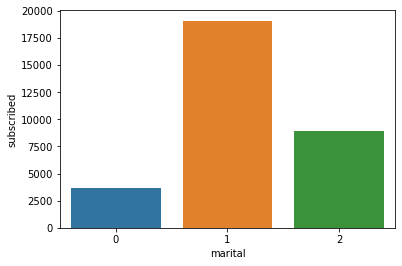

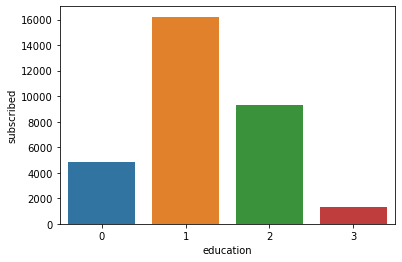

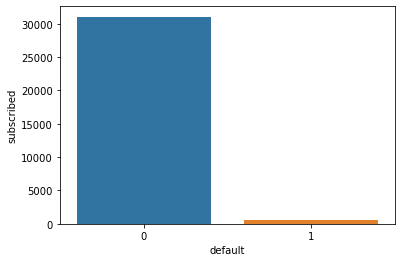

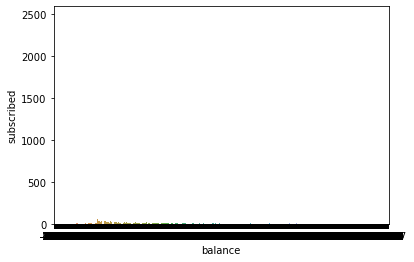

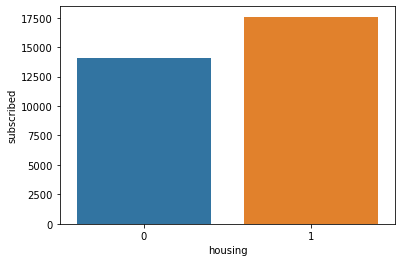

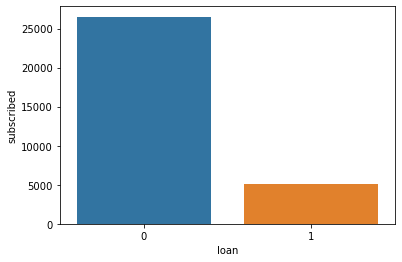

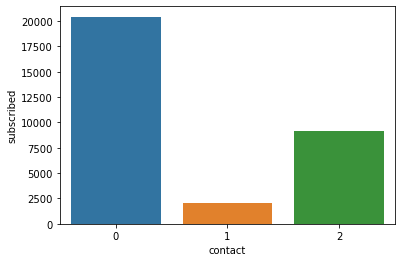

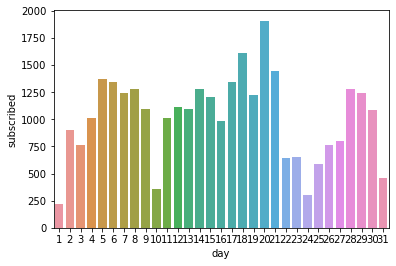

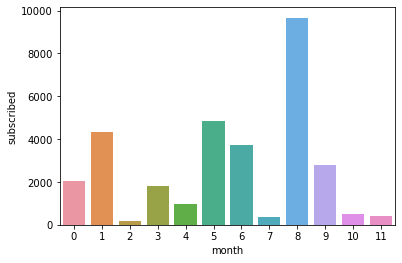

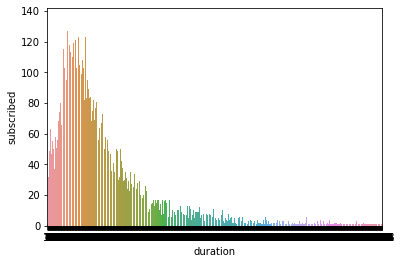

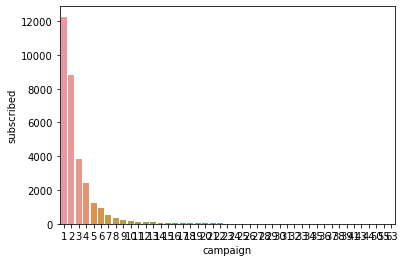

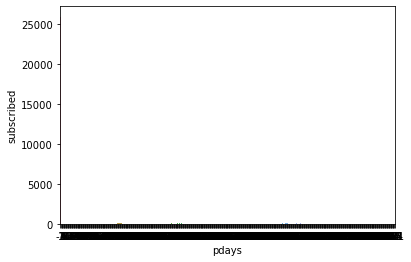

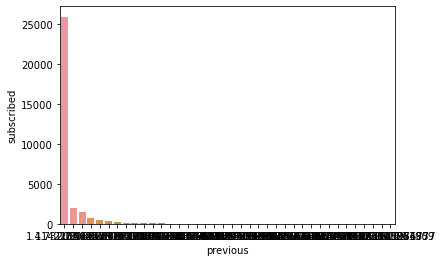

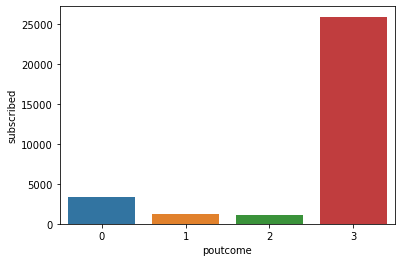

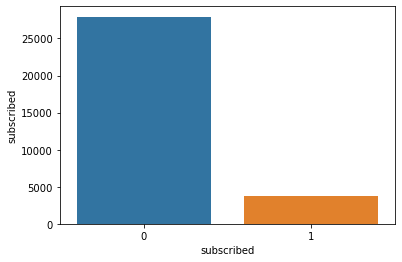

In [320]:
for column in df.columns:
    sns.countplot(x=column, data=df)
    plt.xlabel(column)
    plt.ylabel('subscribed')
    plt.show()

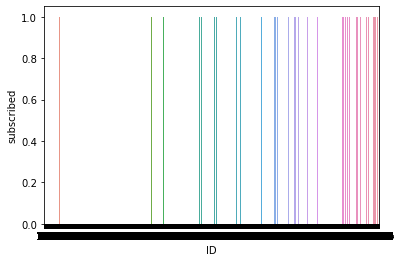

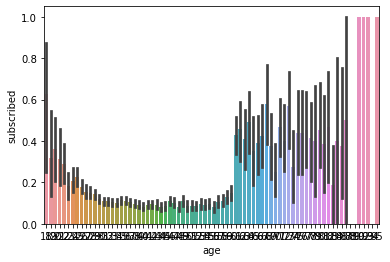

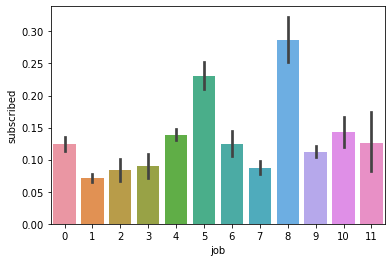

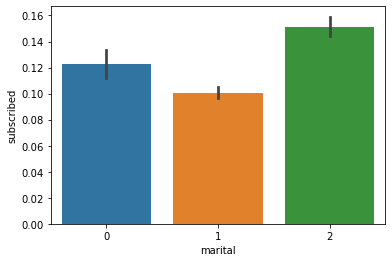

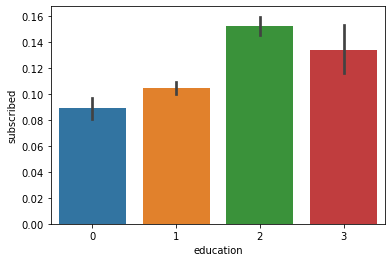

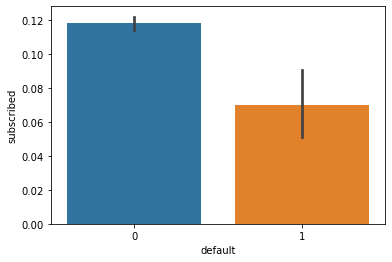

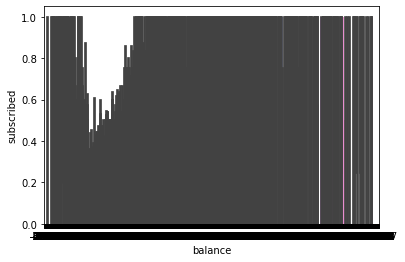

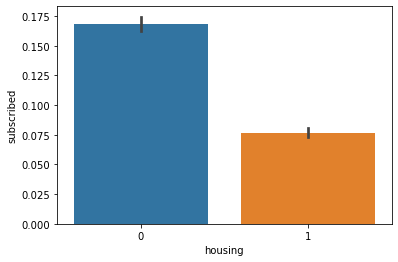

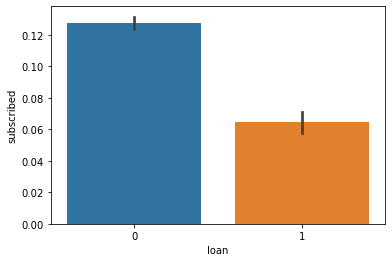

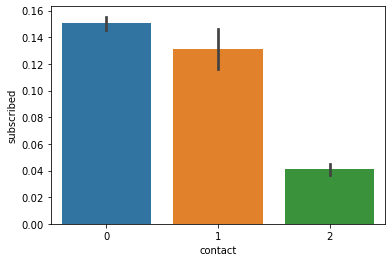

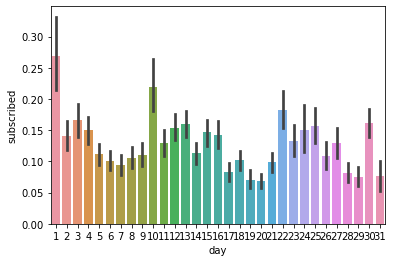

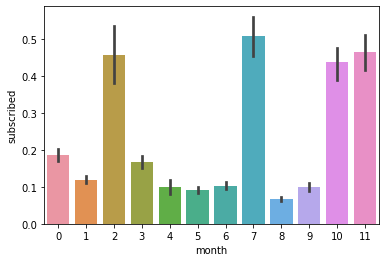

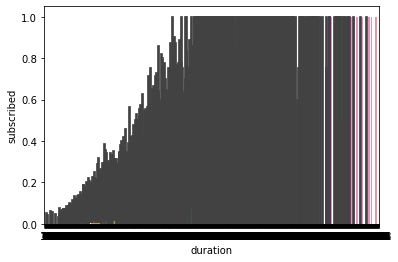

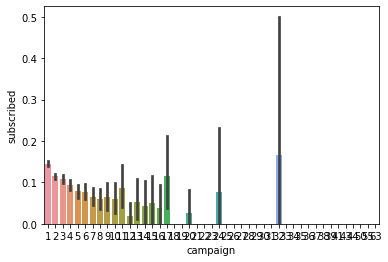

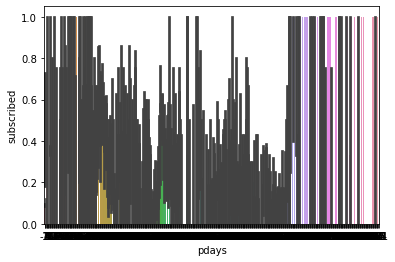

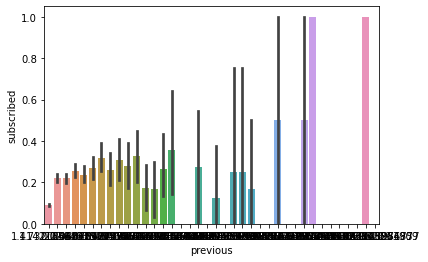

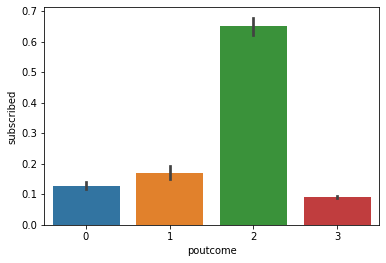

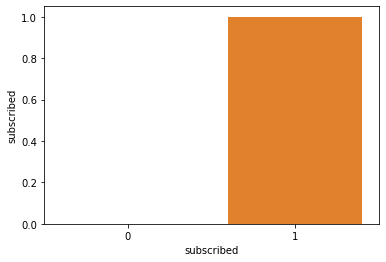

In [327]:
for column in df.columns:
    sns.barplot(x=column, y='subscribed', data=df)
    plt.xlabel(column)
    plt.show()

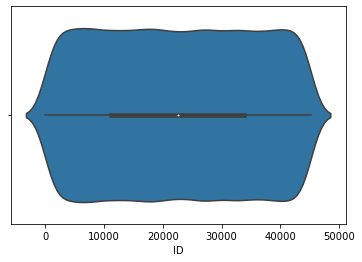

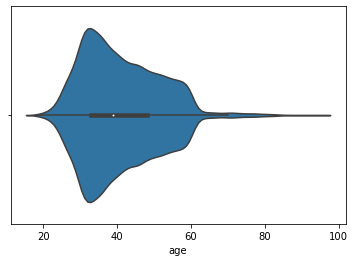

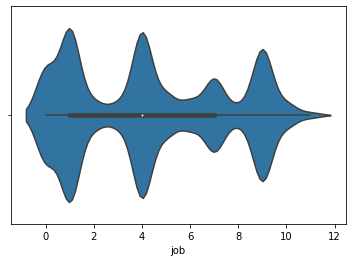

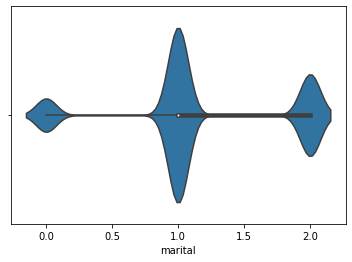

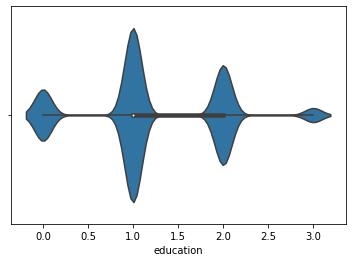

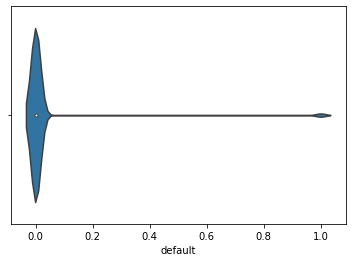

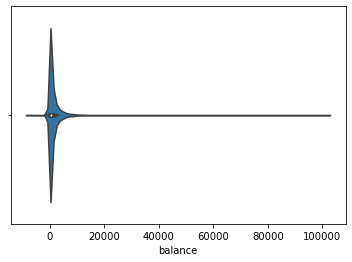

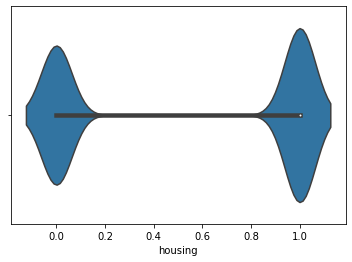

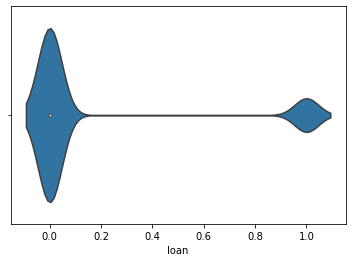

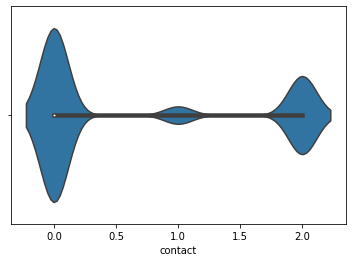

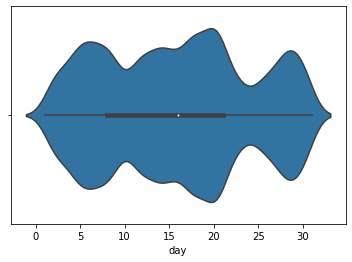

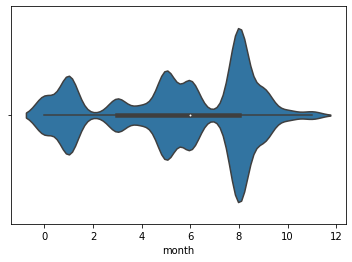

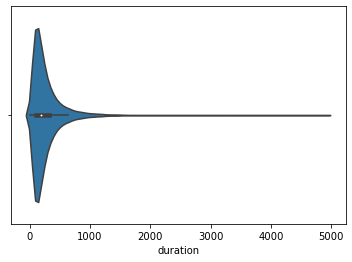

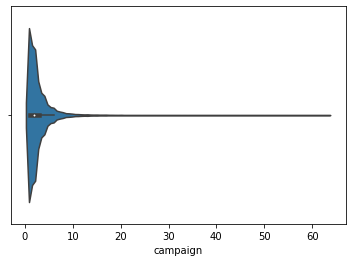

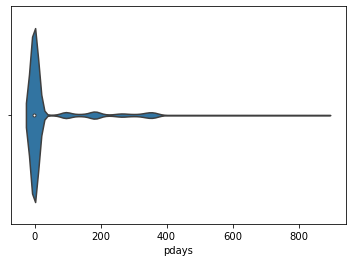

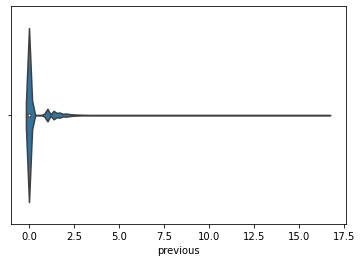

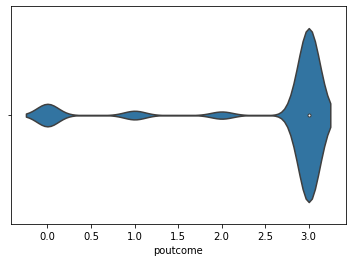

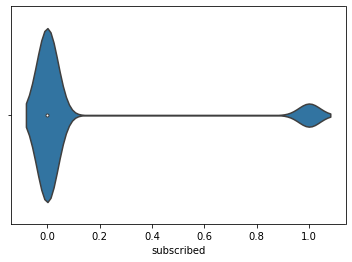

In [328]:
for column in df.columns:
    sns.violinplot(x=column, data=df)
    plt.xlabel(column)
    plt.show()

### summary stats

In [227]:
df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


## Skewness

In [228]:
df.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [229]:
df['previous']=np.sqrt(df['previous'])

<AxesSubplot:xlabel='previous', ylabel='Density'>

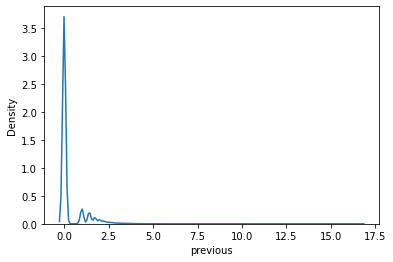

In [230]:
sns.kdeplot(df['previous'])

In [231]:
df['previous'].max()

16.583123951777

In [232]:
df['previous'].min()

0.0

In [233]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0.000000,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0.000000,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0.000000,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,1.732051,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0.000000,3,0


## removing outlier 

In [234]:
z= np.abs(zscore(df))

In [235]:
z

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.271192,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.420657,0.441777,0.364694
1,1.377516,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.420657,0.441777,0.364694
2,0.554001,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.420657,0.441777,0.364694
3,1.636469,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,2.058940,0.576498,2.742026
4,0.556606,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.420657,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.064493,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.420657,0.441777,0.364694
31643,1.347078,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.420657,0.441777,2.742026
31644,0.218265,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.420657,0.441777,0.364694
31645,1.223031,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.538536,2.613048,0.364694


In [236]:
np.where(z<3)

(array([    0,     0,     0, ..., 31646, 31646, 31646], dtype=int64),
 array([ 0,  1,  2, ..., 15, 16, 17], dtype=int64))

In [237]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0.000000,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0.000000,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0.000000,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,1.732051,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0.000000,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0.000000,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0.000000,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,3.464102,0,0


In [238]:
newdf= df[(z < 3).all(axis=1)]
newdf

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0.000000,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0.000000,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0.000000,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,1.732051,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0.000000,3,0
31641,9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0.000000,3,0
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0.000000,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0.000000,3,1


## correlation test

In [239]:
newdf.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,-0.036005,0.069261,0.099854,0.117676,NaN,0.094730,-0.206315,-0.076539,-0.736177,-0.047004,-0.210677,0.011300,-0.087823,0.368370,0.410963,-0.372347,0.310059
age,-0.036005,1.000000,-0.029611,-0.411272,-0.100773,NaN,0.092077,-0.154912,0.005963,0.031477,-0.009208,-0.042651,-0.027426,0.035665,-0.011001,-0.000182,0.002450,-0.007979
job,0.069261,-0.029611,1.000000,0.067749,0.172906,NaN,0.023730,-0.123808,-0.036503,-0.084005,0.021998,-0.089377,-0.003114,0.005356,0.001532,0.012823,-0.011043,0.035298
marital,0.099854,-0.411272,0.067749,1.000000,0.112124,NaN,0.011859,-0.027636,-0.045514,-0.042099,-0.008378,-0.002251,0.015462,-0.022850,0.012204,0.019891,-0.014435,0.055495
education,0.117676,-0.100773,0.172906,0.112124,1.000000,NaN,0.053448,-0.098833,-0.048470,-0.123109,0.017892,-0.057486,0.001771,-0.007736,0.026508,0.052785,-0.041387,0.075769
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.094730,0.092077,0.023730,0.011859,0.053448,NaN,1.000000,-0.057235,-0.094349,-0.036690,0.009119,0.031751,0.031080,-0.014179,0.039239,0.058027,-0.056666,0.069545
housing,-0.206315,-0.154912,-0.123808,-0.027636,-0.098833,NaN,-0.057235,1.000000,0.036613,0.216788,-0.013299,0.276672,0.011512,-0.041615,0.070685,0.010413,-0.048521,-0.148608
loan,-0.076539,0.005963,-0.036503,-0.045514,-0.048470,NaN,-0.094349,0.036613,1.000000,-0.011908,0.011776,0.027945,-0.010025,-0.001448,-0.006669,-0.015793,-0.000131,-0.074070
contact,-0.736177,0.031477,-0.084005,-0.042099,-0.123109,NaN,-0.036690,0.216788,-0.011908,1.000000,-0.029013,0.396241,-0.022873,0.003135,-0.235208,-0.248194,0.244047,-0.156810


<AxesSubplot:>

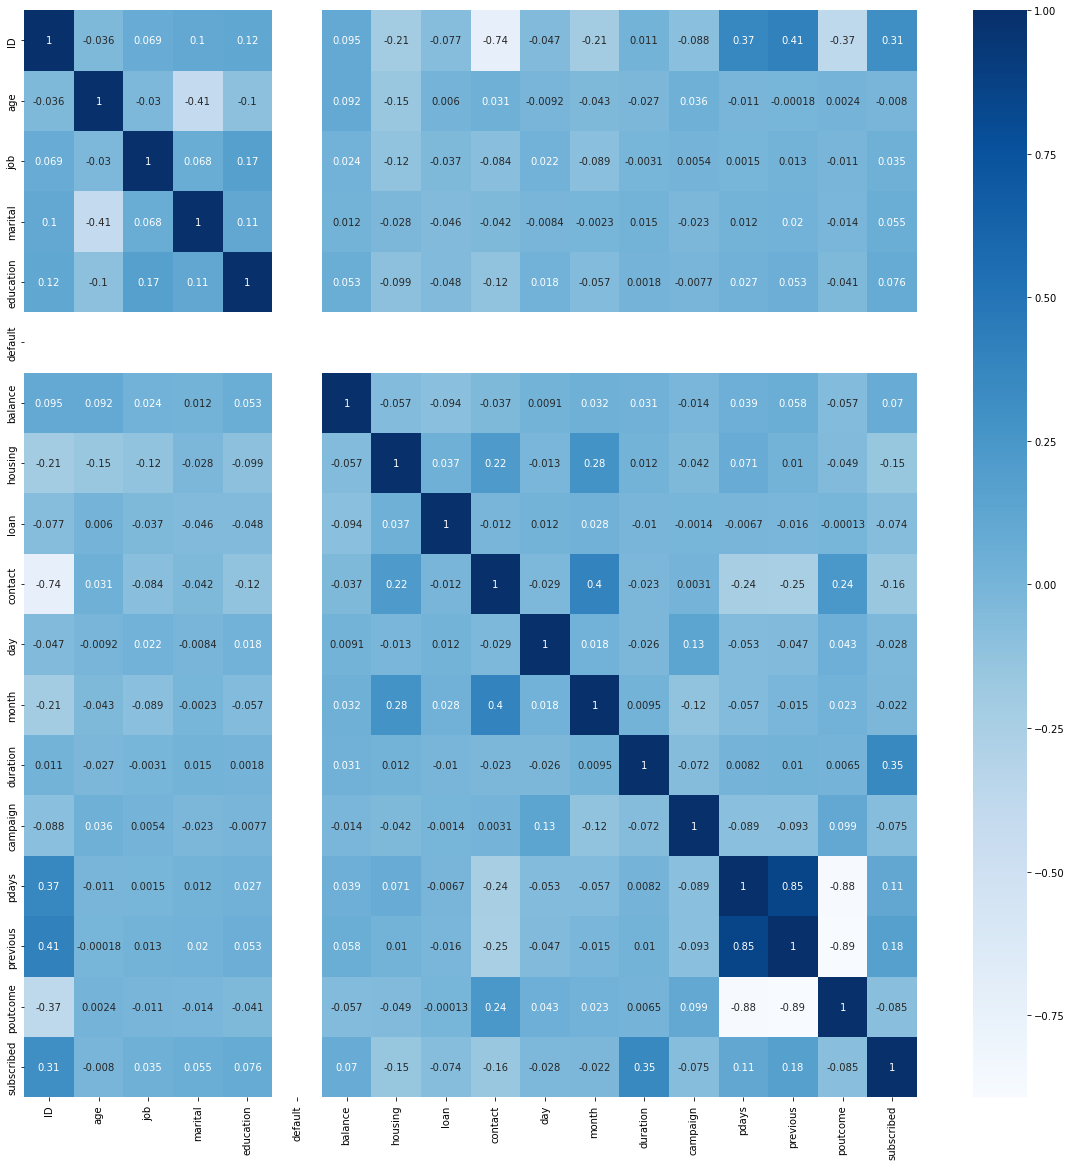

In [240]:
plt.figure(figsize=(20,20))
sns.heatmap(newdf.corr(),cmap='Blues',annot=True)

In [241]:
newdf=newdf.drop('default',axis=1)

In [242]:
newdf

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,1933,0,0,1,19,9,44,2,-1,0.000000,3,0
1,40576,31,11,1,1,3,0,0,0,20,5,91,2,-1,0.000000,3,0
2,15320,27,7,1,1,891,1,0,0,18,5,240,1,-1,0.000000,3,0
3,43962,57,4,0,2,3287,0,0,0,22,6,867,1,84,1.732051,2,1
4,29842,31,9,1,1,119,1,0,0,4,3,380,1,-1,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,2968,0,0,2,20,6,30,4,-1,0.000000,3,0
31641,9476,37,9,2,2,1309,0,0,2,6,6,442,2,-1,0.000000,3,0
31642,36483,29,4,2,2,0,1,0,0,12,8,116,2,-1,0.000000,3,0
31643,40178,53,4,0,2,380,0,1,0,5,6,438,2,-1,0.000000,3,1


## Variance inflation test

In [243]:
x=newdf.iloc[:,:-1]

In [244]:
y=newdf.iloc[:,-1]

In [245]:
newdf

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,1933,0,0,1,19,9,44,2,-1,0.000000,3,0
1,40576,31,11,1,1,3,0,0,0,20,5,91,2,-1,0.000000,3,0
2,15320,27,7,1,1,891,1,0,0,18,5,240,1,-1,0.000000,3,0
3,43962,57,4,0,2,3287,0,0,0,22,6,867,1,84,1.732051,2,1
4,29842,31,9,1,1,119,1,0,0,4,3,380,1,-1,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,2968,0,0,2,20,6,30,4,-1,0.000000,3,0
31641,9476,37,9,2,2,1309,0,0,2,6,6,442,2,-1,0.000000,3,0
31642,36483,29,4,2,2,0,1,0,0,12,8,116,2,-1,0.000000,3,0
31643,40178,53,4,0,2,380,0,1,0,5,6,438,2,-1,0.000000,3,1


In [246]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 27321, dtype: int32

In [247]:
def vif_calculator():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [248]:
vif_calculator()

          vif    columns
0    9.594448         ID
1   16.820267        age
2    2.846316        job
3    5.293540    marital
4    3.849084  education
5    1.464659    balance
6    2.565281    housing
7    1.219691       loan
8    3.959435    contact
9    4.583519        day
10   5.678842      month
11   2.540694   duration
12   2.727469   campaign
13   4.862091      pdays
14   5.604024   previous
15  32.757468   poutcome


In [249]:
#df.drop(['poutcome'],axis=1,inplace=True)

In [250]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

# Data cleansing and feature engineering

## standard scaling (normal distribution)

In [251]:
ss = StandardScaler()

In [252]:
x=ss.fit_transform(x)

In [253]:
x.shape

(27321, 16)

In [254]:
newdf.head()

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,1933,0,0,1,19,9,44,2,-1,0.000000,3,0
1,40576,31,11,1,1,3,0,0,0,20,5,91,2,-1,0.000000,3,0
2,15320,27,7,1,1,891,1,0,0,18,5,240,1,-1,0.000000,3,0
3,43962,57,4,0,2,3287,0,0,0,22,6,867,1,84,1.732051,2,1
4,29842,31,9,1,1,119,1,0,0,4,3,380,1,-1,0.000000,3,0


## smote (balancing data)

In [255]:
SMT = SMOTE()

In [256]:
x.shape

(27321, 16)

In [257]:
y.shape

(27321,)

In [258]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 27321, dtype: int32

In [259]:
new_x,new_y=SMT.fit_resample(x,y)

In [260]:
new_y.value_counts()

0    24585
1    24585
Name: subscribed, dtype: int64

## Training testing

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=80)

In [262]:
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
svc = SVC()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [263]:
estimators=[knn,dtc,svc,RFC,GBC,ABC]
VotingClassifier(estimators=estimators)

VotingClassifier(estimators=[KNeighborsClassifier(), DecisionTreeClassifier(),
                             SVC(), RandomForestClassifier(),
                             GradientBoostingClassifier(),
                             AdaBoostClassifier()])

In [264]:
models = [dtc,svc,knn,RFC,GBC,ABC]

In [265]:
for i in models:
    i.fit(x_train,y_train)
    models_pred=i.predict(x_test)
    print('cross_val_score of ',i,cross_val_score(i, x, y, cv=9))
    print('mean cross_val_score',i,cross_val_score(i, x, y, cv=9).mean())
    print('\n')

cross_val_score of  DecisionTreeClassifier() [0.89031621 0.89624506 0.89920949 0.89920949 0.90744401 0.8955863
 0.89555189 0.89950577 0.89028007]
mean cross_val_score DecisionTreeClassifier() 0.8976609805526071


cross_val_score of  SVC() [0.91798419 0.91699605 0.914361   0.91106719 0.91831357 0.90974967
 0.91334432 0.91894563 0.91466227]
mean cross_val_score SVC() 0.9150470997007779


cross_val_score of  KNeighborsClassifier() [0.90184453 0.90876153 0.90645586 0.90250329 0.90909091 0.90349144
 0.90807249 0.90741351 0.9107084 ]
mean cross_val_score KNeighborsClassifier() 0.9064824401404875


cross_val_score of  RandomForestClassifier() [0.91732543 0.92555995 0.92094862 0.92424242 0.92918314 0.914361
 0.92355848 0.9199341  0.92224053]
mean cross_val_score RandomForestClassifier() 0.9226235687341625


cross_val_score of  GradientBoostingClassifier() [0.92160738 0.92226614 0.92391304 0.91963109 0.93017128 0.91600791
 0.923229   0.91828666 0.92158155]
mean cross_val_score GradientBoostingC

In [272]:
lg= LogisticRegression()

In [274]:
lg.fit(x_train,y_train)

LogisticRegression()

In [282]:
y_pred = lg.predict(x_test)

In [283]:
accuracy = accuracy_score(y_test, y_pred)

In [284]:
accuracy

0.9189387008234218

In [268]:
vc = VotingClassifier(estimators)

In [286]:
estimators = [('log_reg', lg), ('dt', dtc), ('rf', RFC), ('svm', svc)]

In [289]:
vc = VotingClassifier(estimators, voting='soft')

In [290]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())],
                 voting='soft')

In [291]:
accuracy_score(y_test, y_pred)

0.9189387008234218

## Hyperparameter tuning

In [292]:
svc_parameters= {'kernel': ['linear','rbf']}

In [293]:
gscv = GridSearchCV(svc,svc_parameters)

In [294]:
gscv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf']})

In [295]:
print('best score is:',gscv.best_score_,'\n','best estimator_s kernal:',gscv.best_estimator_.kernel,'best parameter :',gscv.best_params_)

best score is: 0.913708060465896 
 best estimator_s kernal: rbf best parameter : {'kernel': 'rbf'}


In [296]:
#svc = SVC( kernel='rbf')

## Prediction

In [297]:
data_for_pred = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [298]:
data_for_pred

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [306]:
for col in data_for_pred.select_dtypes(include='object'):
    print("Value counts before label encoding for column : ",col)
    print(data_for_pred[col].value_counts())
    # Perform label encoding
    le = LabelEncoder()
    data_for_pred[col] = le.fit_transform(data_for_pred[col])

    # Print the value counts after label encoding
    print("Value counts after label encoding for column : ",col)
    print(data_for_pred[col].value_counts())

Value counts before label encoding for column :  job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
Value counts after label encoding for column :  job
1     2890
4     2819
9     2290
0     1540
7     1251
5      690
2      479
6      456
10     398
3      366
8      303
11      82
Name: job, dtype: int64
Value counts before label encoding for column :  marital
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
Value counts after label encoding for column :  marital
1    8119
2    3868
0    1577
Name: marital, dtype: int64
Value counts before label encoding for column :  education
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
Value counts after label encoding for co

In [316]:
def prediction(data_for_pred):
    #data1= np.array(data1)
    #data1= data1.reshape(1,-1)
    pred_x = data_for_pred.iloc[:,:-1]
    pred= RFC.predict(pred_x)
    print(pred)

In [317]:
prediction(data_for_pred)

[0 0 0 ... 1 1 1]


C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Saving Data

In [319]:
import joblib

In [318]:
joblib.dump(RFC,'FD-Prediction')

['FD-Prediction']